# Exploratory Data Analysis

plpred é uma ferramenta desenvolvida para predizer a localização subcelular  

## Data Collection 

## Data Preprocessing

In [1]:
from Bio import SeqIO
from Bio.SeqUtils import ProtParam 
import pandas as pd

In [16]:
def compute_aa_composition(protein_sequence):
    analyzer = ProtParam.ProteinAnalysis(str(protein_sequence))
    return analyzer.get_amino_acids_percent()

In [19]:
df = pd.DataFrame()

handle = open('../data/raw/membrane.fasta')
parser = SeqIO.parse(handle, 'fasta')

for protein in parser: 
    protein_data = compute_aa_composition(protein.seq)
    protein_data['membrane'] = 1
    df = df.append([protein_data], ignore_index=True)
    
handle = open('../data/raw/cytoplasm.fasta')
parser = SeqIO.parse(handle, 'fasta')

for protein in parser: 
    protein_data = compute_aa_composition(protein.seq)
    protein_data['membrane'] = 0
    df = df.append([protein_data], ignore_index=True)

In [20]:
df

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,membrane
0,0.308789,0.004751,0.047506,0.106888,0.014252,0.049881,0.002375,0.033254,0.156770,0.045131,...,0.026128,0.023753,0.047506,0.021378,0.052257,0.014252,0.019002,0.002375,0.011876,1
1,0.072368,0.006579,0.085526,0.052632,0.026316,0.085526,0.026316,0.085526,0.046053,0.072368,...,0.006579,0.059211,0.032895,0.065789,0.046053,0.039474,0.105263,0.026316,0.026316,1
2,0.039340,0.004230,0.075296,0.070643,0.055415,0.054569,0.009729,0.104907,0.076988,0.085871,...,0.096870,0.024112,0.024958,0.019459,0.076988,0.051607,0.047377,0.006768,0.060068,1
3,0.143204,0.021845,0.019417,0.016990,0.067961,0.131068,0.004854,0.060680,0.036408,0.109223,...,0.009709,0.063107,0.019417,0.026699,0.036408,0.063107,0.050971,0.033981,0.043689,1
4,0.111597,0.007659,0.050328,0.063457,0.020788,0.050328,0.016411,0.060175,0.025164,0.145514,...,0.038293,0.033917,0.094092,0.066740,0.066740,0.055799,0.049234,0.008753,0.013129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.137577,0.002053,0.073922,0.059548,0.012320,0.102669,0.024641,0.039014,0.024641,0.090349,...,0.020534,0.039014,0.024641,0.067762,0.043121,0.086242,0.125257,0.006160,0.014374,0
19996,0.179167,0.004167,0.064583,0.058333,0.010417,0.100000,0.022917,0.033333,0.018750,0.077083,...,0.020833,0.050000,0.018750,0.079167,0.033333,0.066667,0.137500,0.006250,0.014583,0
19997,0.088115,0.010246,0.063525,0.075820,0.024590,0.086066,0.032787,0.086066,0.077869,0.051230,...,0.055328,0.022541,0.026639,0.034836,0.032787,0.069672,0.092213,0.000000,0.040984,0
19998,0.161926,0.013129,0.052516,0.061269,0.035011,0.113786,0.021882,0.065646,0.070022,0.061269,...,0.026258,0.032823,0.024070,0.048140,0.048140,0.045952,0.074398,0.004376,0.019694,0


## Exploratory Data Analysis 

In [21]:
df_grouped = df.groupby('membrane').mean()
df_grouped

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
membrane,,,,,,,,,,,,,,,,,,,,
0,0.099760,0.011553,0.056924,0.065891,0.026780,0.089107,0.026264,0.066143,0.054318,0.084891,0.020275,0.043687,0.038345,0.034958,0.052014,0.051129,0.060336,0.087106,0.005599,0.024857
1,0.105716,0.009945,0.057201,0.052703,0.040723,0.083553,0.024862,0.059500,0.038446,0.097210,0.028540,0.031946,0.049972,0.035499,0.054843,0.053143,0.054252,0.078285,0.017036,0.026549


Populating the interactive namespace from numpy and matplotlib


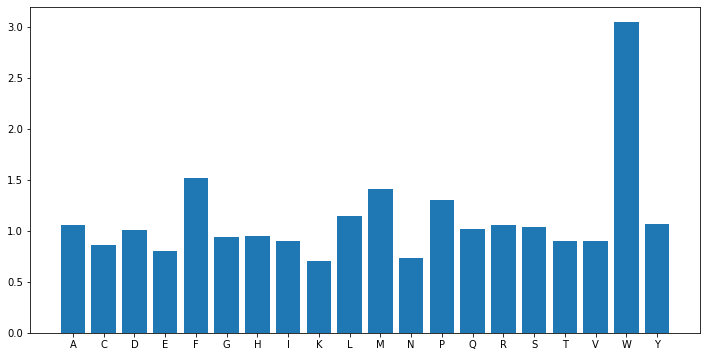

In [26]:
%pylab inline

pylab.rcParams['figure.figsize'] = (12, 6)
aminoacids = df_grouped.columns

cytoplasm_means_composition = df_grouped.loc[0]
membrane_means_composition = df_grouped.loc[1]

relative_difference = membrane_means_composition / cytoplasm_means_composition

plt.bar(aminoacids, relative_difference)
plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.drop(['membrane'], axis=1))

for group, df_group in df.groupby('membrane'):
    components = pca.transform(df_group.drop('membrane', axis=1))
    plt.scatter(
        components[:,0],
        components[:,1],
        s=0.5,
        label='Membrane' if group == 0 else 'Cytoplasm',
        color='red' if group == 0 else 'blue'
    )
    
plt.show()

## Model Traning

In [29]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop(['membrane'], axis=1)
y = df['membrane']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Model Validation

In [37]:
from sklearn.metrics import classification_report

In [38]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2461
           1       0.96      0.95      0.95      2539

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000

